In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)

W0710 22:19:03.639864  5392 deprecation.py:323] From <ipython-input-1-38fef2a4516b>:7: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0710 22:19:03.644852  5392 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0710 22:19:03.646846  5392 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use

Extracting MNIST_data\train-images-idx3-ubyte.gz


W0710 22:19:03.965993  5392 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0710 22:19:04.029823  5392 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
# Parameter
learning_rate = 0.01
training_epochs = 10 # 5组训练
batch_size = 256
display_step = 1
examples_to_show = 10
# Netword Parameters
n_input = 784
# tf Graph input
X = tf.placeholder('float', [None, n_input])

In [3]:
# hidden layer settings
n_hidden_1 = 128 # 1st layer num features
n_hidden_2 = 64  # 2nd layer num features
n_hidden_3 = 10  # 3nd layer num features
n_hidden_4 = 2   # 4th layer num features
weights = {
    'encoder_h1': tf.Variable(tf.random_normal(
        [n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal(
        [n_hidden_1, n_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal(
        [n_hidden_2, n_hidden_3])),
    'encoder_h4': tf.Variable(tf.random_normal(
        [n_hidden_3, n_hidden_4])),
    
    'decoder_h1': tf.Variable(tf.random_normal(
        [n_hidden_4, n_hidden_3])),
    'decoder_h2': tf.Variable(tf.random_normal(
        [n_hidden_3, n_hidden_2])),
    'decoder_h3': tf.Variable(tf.random_normal(
        [n_hidden_2, n_hidden_1])),
    'decoder_h4': tf.Variable(tf.random_normal(
        [n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal(
        [n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal(
        [n_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal(
        [n_hidden_3])),
    'encoder_b4': tf.Variable(tf.random_normal(
        [n_hidden_4])),
    
    'decoder_b1': tf.Variable(tf.random_normal(
        [n_hidden_3])),
    'decoder_b2': tf.Variable(tf.random_normal(
        [n_hidden_2])),
    'decoder_b3': tf.Variable(tf.random_normal(
        [n_hidden_1])),
    'decoder_b4': tf.Variable(tf.random_normal(
        [n_input])),
}

In [4]:
# Building the encoder
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, 
        weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, 
        weights['encoder_h2']), biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, 
        weights['encoder_h3']), biases['encoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, 
        weights['encoder_h4']), biases['encoder_b4']))
    return layer_4
# Building the decoder
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, 
        weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, 
        weights['decoder_h2']), biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, 
        weights['decoder_h3']), biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, 
        weights['decoder_h4']), biases['decoder_b4']))
    return layer_4

In [5]:
# Construct model
encoder_op = encoder(X) # 128 Features
decoder_op = decoder(encoder_op) # 784 Features

# Prediction
y_pred = decoder_op # After
y_true = X # Before
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

W0710 22:19:04.697233  5392 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch:  0001 cost= 0.078915171
Epoch:  0002 cost= 0.068416558
Epoch:  0003 cost= 0.062132895
Epoch:  0004 cost= 0.056289542
Epoch:  0005 cost= 0.054420218
Epoch:  0006 cost= 0.052317910
Epoch:  0007 cost= 0.049488526
Epoch:  0008 cost= 0.049155362
Epoch:  0009 cost= 0.046474412
Epoch:  0010 cost= 0.045825001
Optimization Finished!


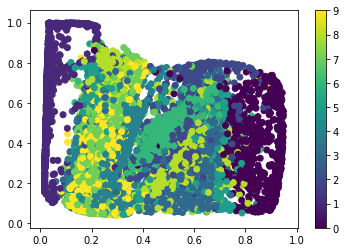

In [6]:
# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], 
                            feed_dict={X: batch_xs})
        if epoch % display_step == 0:
            print('Epoch: ', '%04d' % (epoch+1),
                 'cost=','{:.9f}'.format(c))
                
    print('Optimization Finished!')
    
#     encode_decode = sess.run(
#         y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
#     f, a = plt.subplots(2, 10, figsize=(10, 2))
#     for i in range(examples_to_show):
#         a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
#         a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
#     plt.show()
    
    encoder_result = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=mnist.test.labels)
    plt.colorbar()
    plt.show()